# 결정 트리(Decision Tree)

* 분류와 회귀에 사용되는 지도 학습 방법
* 데이터 특성으로부터 추론된 결정 규칙을 통해 값을 예측
* if-then-else 결정 규칙을 통해 데이터 학습
* 트리의 깊이가 깊을수록 복잡한 모델
* Decision Tree 장점
  * 이해와 해석이 쉽다(판단/주장에 설득력을 얻는다).
  * 시각화가 용이하다.
  * 많은 데이터 전처리가 필요하지 않다(**규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다**).
  * 수치형과 범주형 데이터 모두를 다룰 수 있다.

In [ ]:
import pandas as pd
import numpy as np
import graphviz
import multiprocessing
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

<ipython-input-1-b3c411ee4556>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


In [ ]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_diabetes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

# 분류 - DecisionTreeClassifier()

* ```DecisionTreeClassifier```는 분류를 위한 결정트리 모델
* 두 개의 배열 X, y를 입력 받음
  * X는 [n_samples, n_features] 크기의 데이터 특성 배열
  * y는 [n_samples] 크기의 정답 배열

In [ ]:
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


*Decision Tree 특징: 많은 데이터 전처리가 필요하지 않다(규칙을 학습하기 때문에 전처리에 큰 영향을 받지 않는다).*

In [ ]:
# 전처리 없이 학습

model = DecisionTreeClassifier()

score_list = cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,                                   # cv: the number of cross validation fold
    n_jobs=multiprocessing.cpu_count()
)

print(score_list)
print(sum(score_list)/len(score_list))

[0.96666667 0.96666667 0.9        0.96666667 1.        ]
0.9600000000000002


In [ ]:
# 전처리 후 학습

model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)

cross_val_score(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5,
    n_jobs=multiprocessing.cpu_count()
)

print(score_list)
print(sum(score_list)/len(score_list))

[0.96666667 0.96666667 0.9        0.96666667 1.        ]
0.9600000000000002


## 학습된 Decision Tree 시각화

In [ ]:
model = DecisionTreeClassifier()
model.fit(iris.data, iris.target)

DecisionTreeClassifier()

* 텍스트를 통한 시각화

In [ ]:
r = tree.export_text(decision_tree=model,
                     feature_names=iris.feature_names)
print(r)

|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



* plot_tree를 사용한 시각화

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

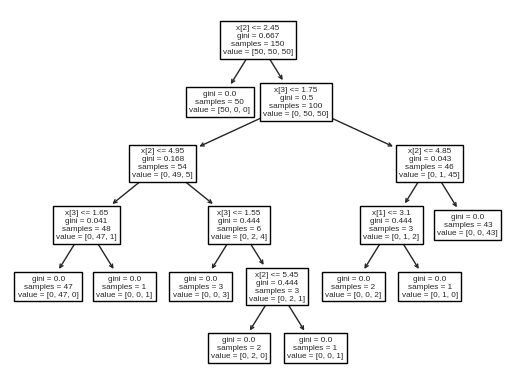

In [ ]:
tree.plot_tree(model)

* graphvis를 사용한 시각화

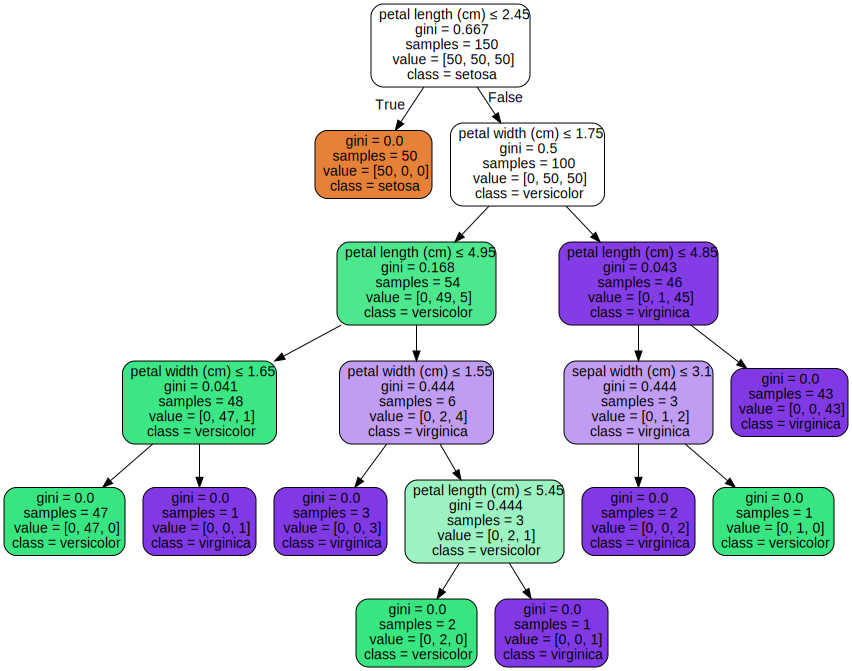

In [ ]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

* 결정 경계 시각화

<ipython-input-28-d99142dc1076>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-28-d99142dc1076>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-28-d99142dc1076>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-28-d99142dc1076>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-28-d99142dc1076>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipyt

(0.0, 7.88, -0.9, 3.4800000000000044)

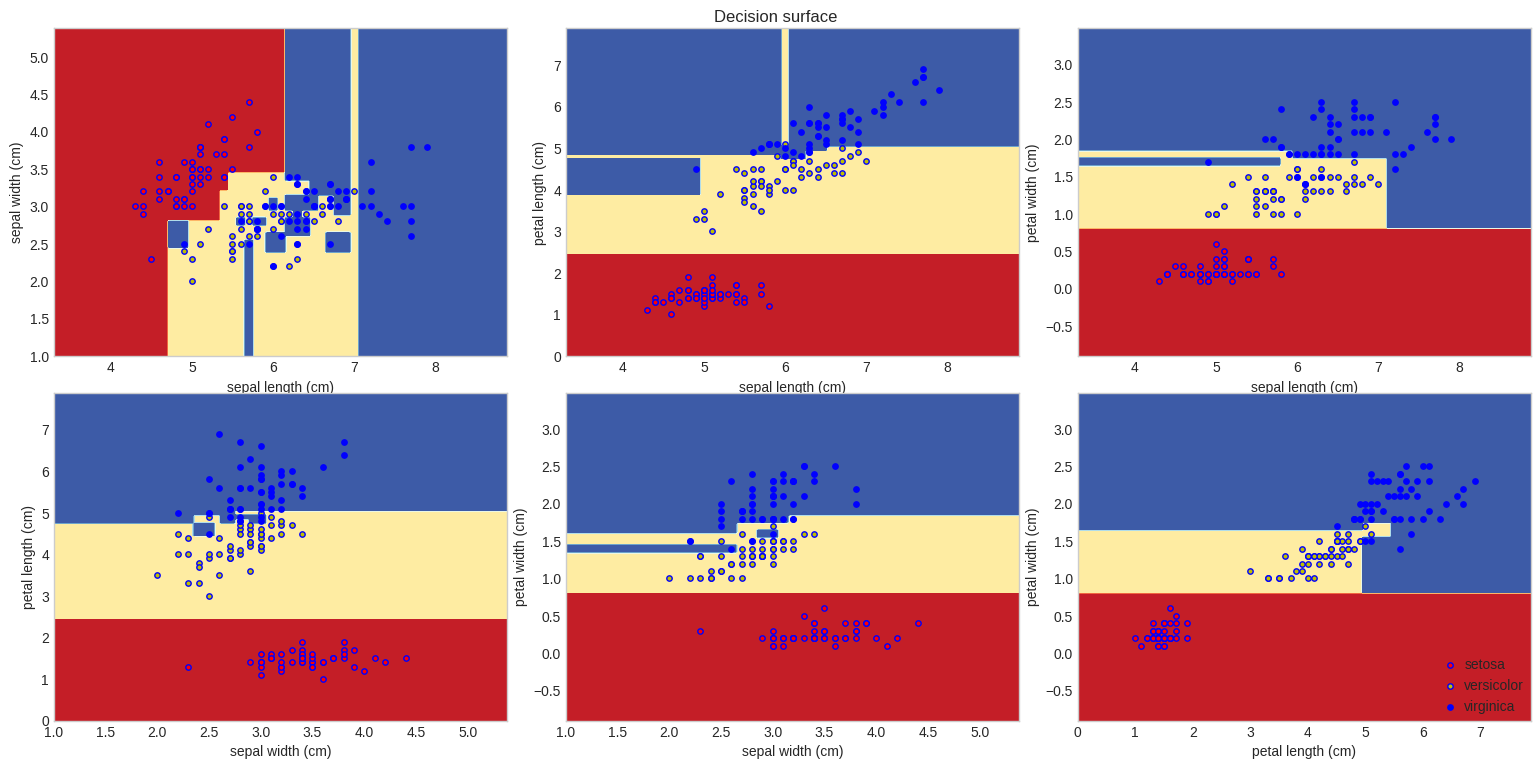

In [ ]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    model = DecisionTreeClassifier()
    model = model.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

* 하이퍼파라미터를 변경해보면서 결정 경계의 변화 확인

<ipython-input-29-e5cb0b37cd15>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-29-e5cb0b37cd15>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-29-e5cb0b37cd15>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-29-e5cb0b37cd15>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipython-input-29-e5cb0b37cd15>:32: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
<ipyt

(0.0, 7.88, -0.9, 3.4800000000000044)

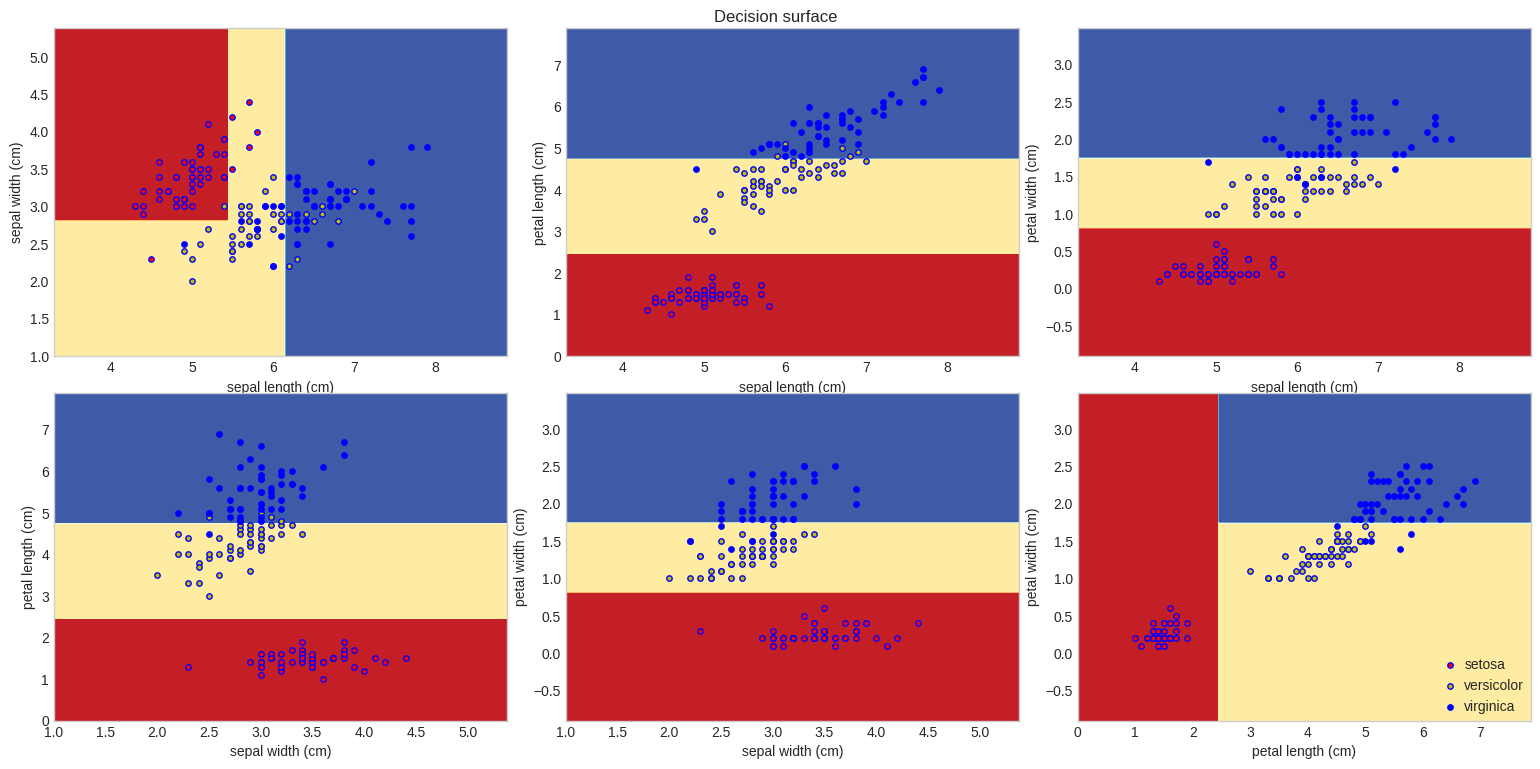

In [ ]:
n_classes = 3
plot_colors = 'ryb'
plot_step = 0.02

plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    X = iris.data[:, pair]
    y = iris.target

    model = DecisionTreeClassifier(max_depth=2)
    model = model.fit(X, y)

    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min()-1, X[:, 0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:, 1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=-0.5, w_pad=0.5, pad=2.5)

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='b', s=15)

plt.suptitle('Decision surface')
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis('tight')

# 회귀

In [ ]:
diabetes = load_diabetes()

In [ ]:
diabetes_df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## 학습된 Decision Tree 시각화

In [ ]:
model = DecisionTreeRegressor()
model.fit(diabetes.data, diabetes.target)

DecisionTreeRegressor()

* 텍스트를 통한 시각화

In [ ]:
print(tree.export_text(model, feature_names=diabetes.feature_names))

|--- s5 <= -0.00
|   |--- bmi <= 0.01
|   |   |--- s3 <= 0.02
|   |   |   |--- s1 <= 0.06
|   |   |   |   |--- sex <= 0.00
|   |   |   |   |   |--- bp <= -0.03
|   |   |   |   |   |   |--- age <= -0.05
|   |   |   |   |   |   |   |--- bp <= -0.09
|   |   |   |   |   |   |   |   |--- value: [55.00]
|   |   |   |   |   |   |   |--- bp >  -0.09
|   |   |   |   |   |   |   |   |--- bp <= -0.05
|   |   |   |   |   |   |   |   |   |--- s6 <= -0.03
|   |   |   |   |   |   |   |   |   |   |--- s1 <= -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- s1 >  -0.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- s6 >  -0.03
|   |   |   |   |   |   |   |   |   |   |--- value: [200.00]
|   |   |   |   |   |   |   |   |--- bp >  -0.05
|   |   |   |   |   |   |   |   |   |--- age <= -0.09
|   |   |   |   |   |   |   |   |   |   |--- value: [134.00]
|   |   

* plot_tree를 사용한 시각화

[Text(0.5359647692877383, 0.9761904761904762, 'x[8] <= -0.004\nsquared_error = 5929.885\nsamples = 442\nvalue = 152.133'),
 Text(0.3113206787738279, 0.9285714285714286, 'x[2] <= 0.006\nsquared_error = 3240.821\nsamples = 218\nvalue = 109.986'),
 Text(0.20896928129829984, 0.8809523809523809, 'x[6] <= 0.021\nsquared_error = 2143.968\nsamples = 171\nvalue = 96.31'),
 Text(0.11582302936630602, 0.8333333333333334, 'x[4] <= 0.063\nsquared_error = 2856.847\nsamples = 87\nvalue = 108.805'),
 Text(0.08996651210716125, 0.7857142857142857, 'x[1] <= 0.003\nsquared_error = 2496.899\nsamples = 85\nvalue = 105.682'),
 Text(0.044435857805255025, 0.7380952380952381, 'x[3] <= -0.035\nsquared_error = 2955.72\nsamples = 39\nvalue = 118.846'),
 Text(0.02575991756826378, 0.6904761904761905, 'x[0] <= -0.051\nsquared_error = 2357.959\nsamples = 21\nvalue = 100.429'),
 Text(0.012364760432766615, 0.6428571428571429, 'x[3] <= -0.092\nsquared_error = 2049.0\nsamples = 8\nvalue = 133.5'),
 Text(0.01030396702730551

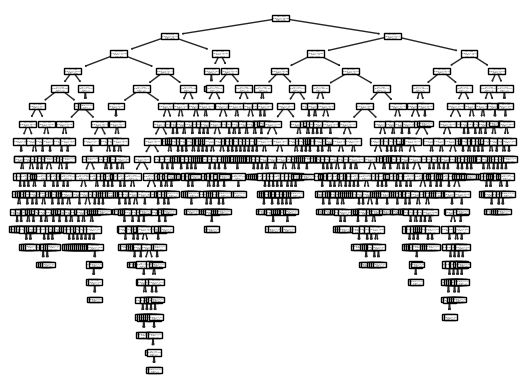

In [ ]:
tree.plot_tree(model)

* graphviz를 사용한 시각화

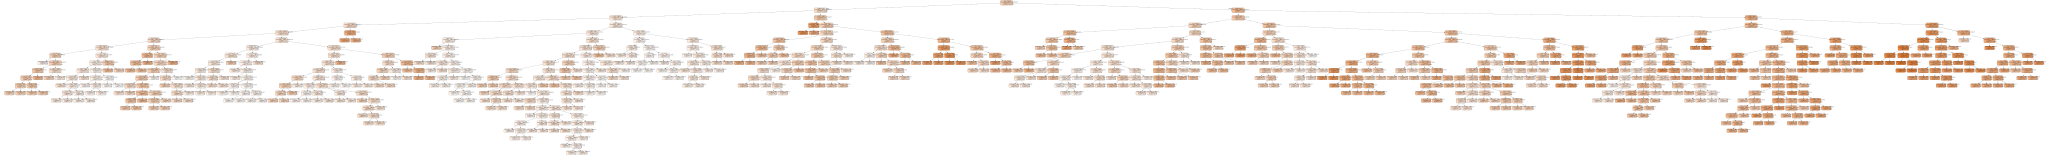

In [ ]:
dot_data = tree.export_graphviz(decision_tree=model,
                                feature_names=diabetes.feature_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

* 회귀식 시각화

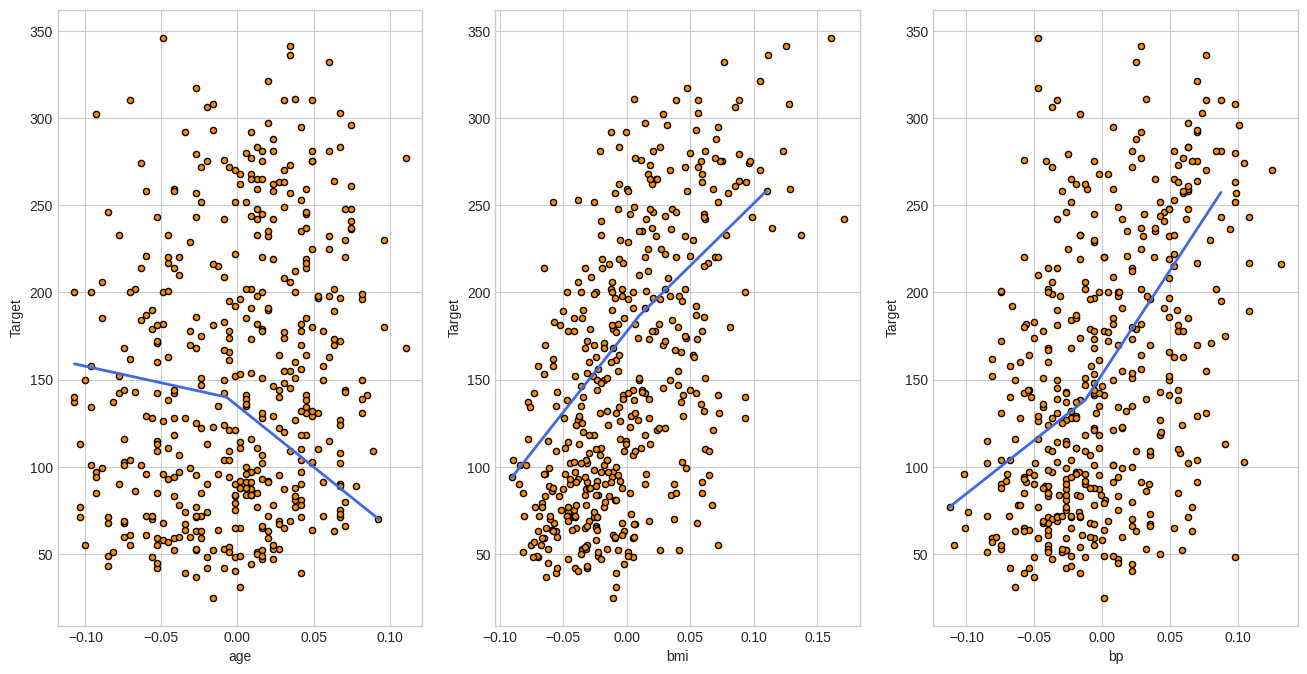

In [ ]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 2, 3]):
    X = diabetes.data[:, pair].reshape(-1, 1)
    y = diabetes.target

    model = DecisionTreeRegressor()
    model.fit(X, y)

    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)

    plt.subplot(1, 3, pairidx + 1)
    plt.scatter(X, y, s=20, edgecolors='k',
                c='darkorange', label='data')
    plt.plot(X_test, predict, color='royalblue', linewidth=2)
    plt.xlabel(diabetes.feature_names[pair])
    plt.ylabel('Target')

* 하이퍼파라미터를 변경해보면서 회귀식 시각화

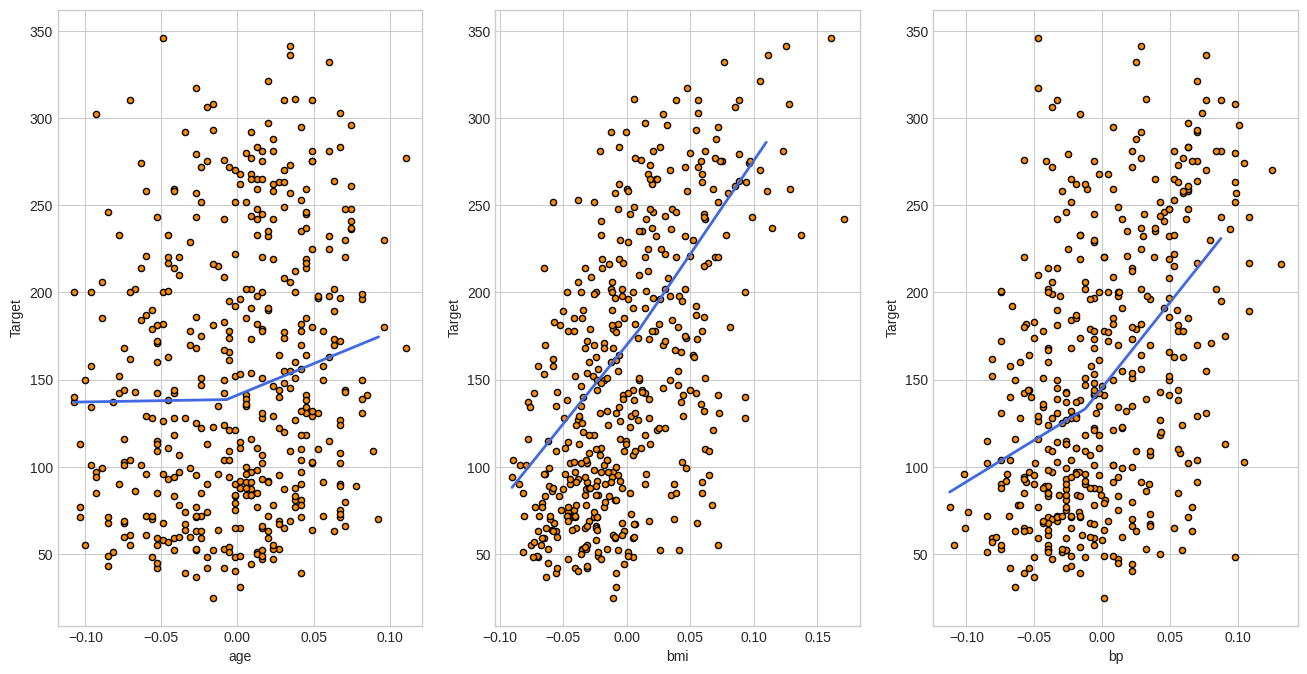

In [ ]:
plt.figure(figsize=(16, 8))

for pairidx, pair in enumerate([0, 2, 3]):
    X = diabetes.data[:, pair].reshape(-1, 1)
    y = diabetes.target

    model = DecisionTreeRegressor(max_depth=3)
    model.fit(X, y)

    X_test = np.arange(min(X), max(X), 0.1)[:, np.newaxis]
    predict = model.predict(X_test)

    plt.subplot(1, 3, pairidx + 1)
    plt.scatter(X, y, s=20, edgecolors='k',
                c='darkorange', label='data')
    plt.plot(X_test, predict, color='royalblue', linewidth=2)
    plt.xlabel(diabetes.feature_names[pair])
    plt.ylabel('Target')